In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Data reading

In [ ]:
import kagglehub

path = kagglehub.dataset_download("boukraailyesali/traffic-road-object-detection-dataset-using-yolo")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'traffic-road-object-detection-dataset-using-yolo' dataset.
Path to dataset files: /kaggle/input/traffic-road-object-detection-dataset-using-yolo


# Writing data.yaml file

In [ ]:
import os

data_yaml = f"""
train: {os.path.join(path, "train")}
val: {os.path.join(path, "val")}

nc: {1}
names: {['car']}
"""

with open(("/content/data.yaml"), "w") as f:
    f.write(data_yaml)

In [ ]:
for root, dirs, files in os.walk(path):
    print(root, dirs, files)
    break

/kaggle/input/traffic-road-object-detection-dataset-using-yolo ['val', 'train'] ['classes.txt']


# Displaying sample images with their labels

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

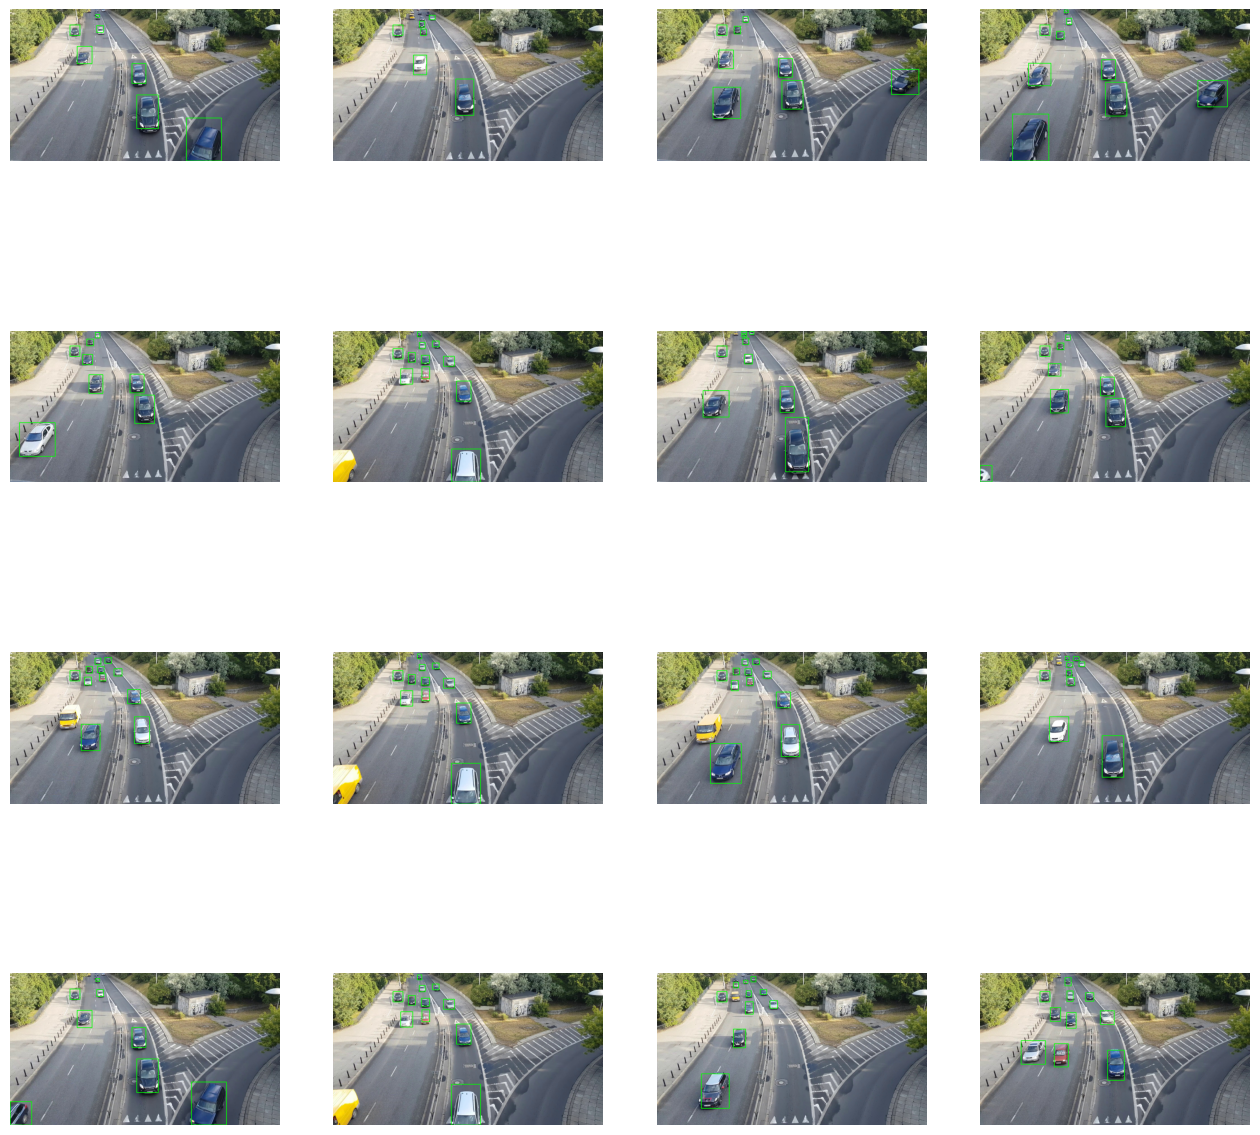

In [ ]:
train_images = os.path.join(path, "train/images")
train_labels = os.path.join(path, "train/labels")

val_images = os.path.join(path, "val/images")
val_labels = os.path.join(path, "val/labels")

image_files = os.listdir(train_images)

sample_images = random.sample(image_files, 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(sample_images):
    row = i // 4
    col = i % 4

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

# Model training

In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
image = cv2.imread(os.path.join(path, "train/images/frame_0000.jpg"))
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")


The image has dimensions 1920x1080 and 3 channels.


In [ ]:
model.train(
    data="/content/data.yaml",
    epochs=20,
    imgsz=height,
    batch = 8
)

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1080, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f67da028140>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Model Evaluation

# Metrics
* Mean Average Precision (MAP) : Average of areas under the precision–recall curves for each class, depends on intersection over union (IOU) threshold.

* Precision : A higher precision means that the model is better at correctly identifying true positive detections and minimizing false positives.

* Recall : A higher recall means that the model is better at correctly identifying all true positive detections and minimizing false negatives.

# Losses
* Box loss : Measures how well the predicted bounding box matches the ground-truth box.

* Distribution Focal loss (DFL): Used in YOLOv8 for bounding box regression, Instead of predicting just 4 box coordinates (x, y, w, h), YOLO predicts a probability distribution over possible discrete locations for each box edge. DFL penalizes the model if the predicted distribution doesn’t put enough weight near the true boundary.

* Classification loss (CLS) : Measures the difference between the predicted class probabilities and the actual class labels of the objects in the training data.


In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
metrics = model.val(data= "/content/data.yaml")

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 1152.1±450.9 MB/s, size: 770.4 KB)
val: Scanning /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/labels... 100 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 387.0it/s 0.3s
WARNING ⚠️ val: Cache directory /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.7it/s 4.1s
                   all        100        493      0.972      0.781      0.913      0.567
Speed: 3.9ms preprocess, 13.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /content/runs/detect/val3


<Axes: >

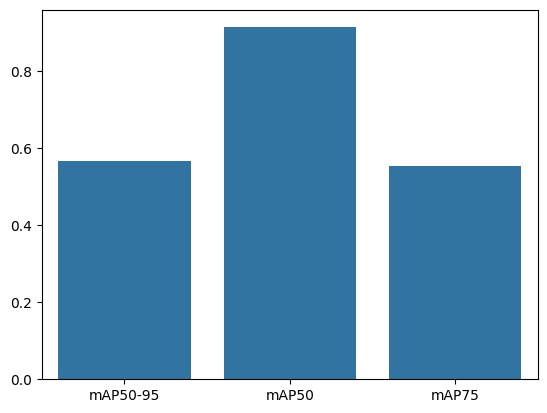

In [ ]:
sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

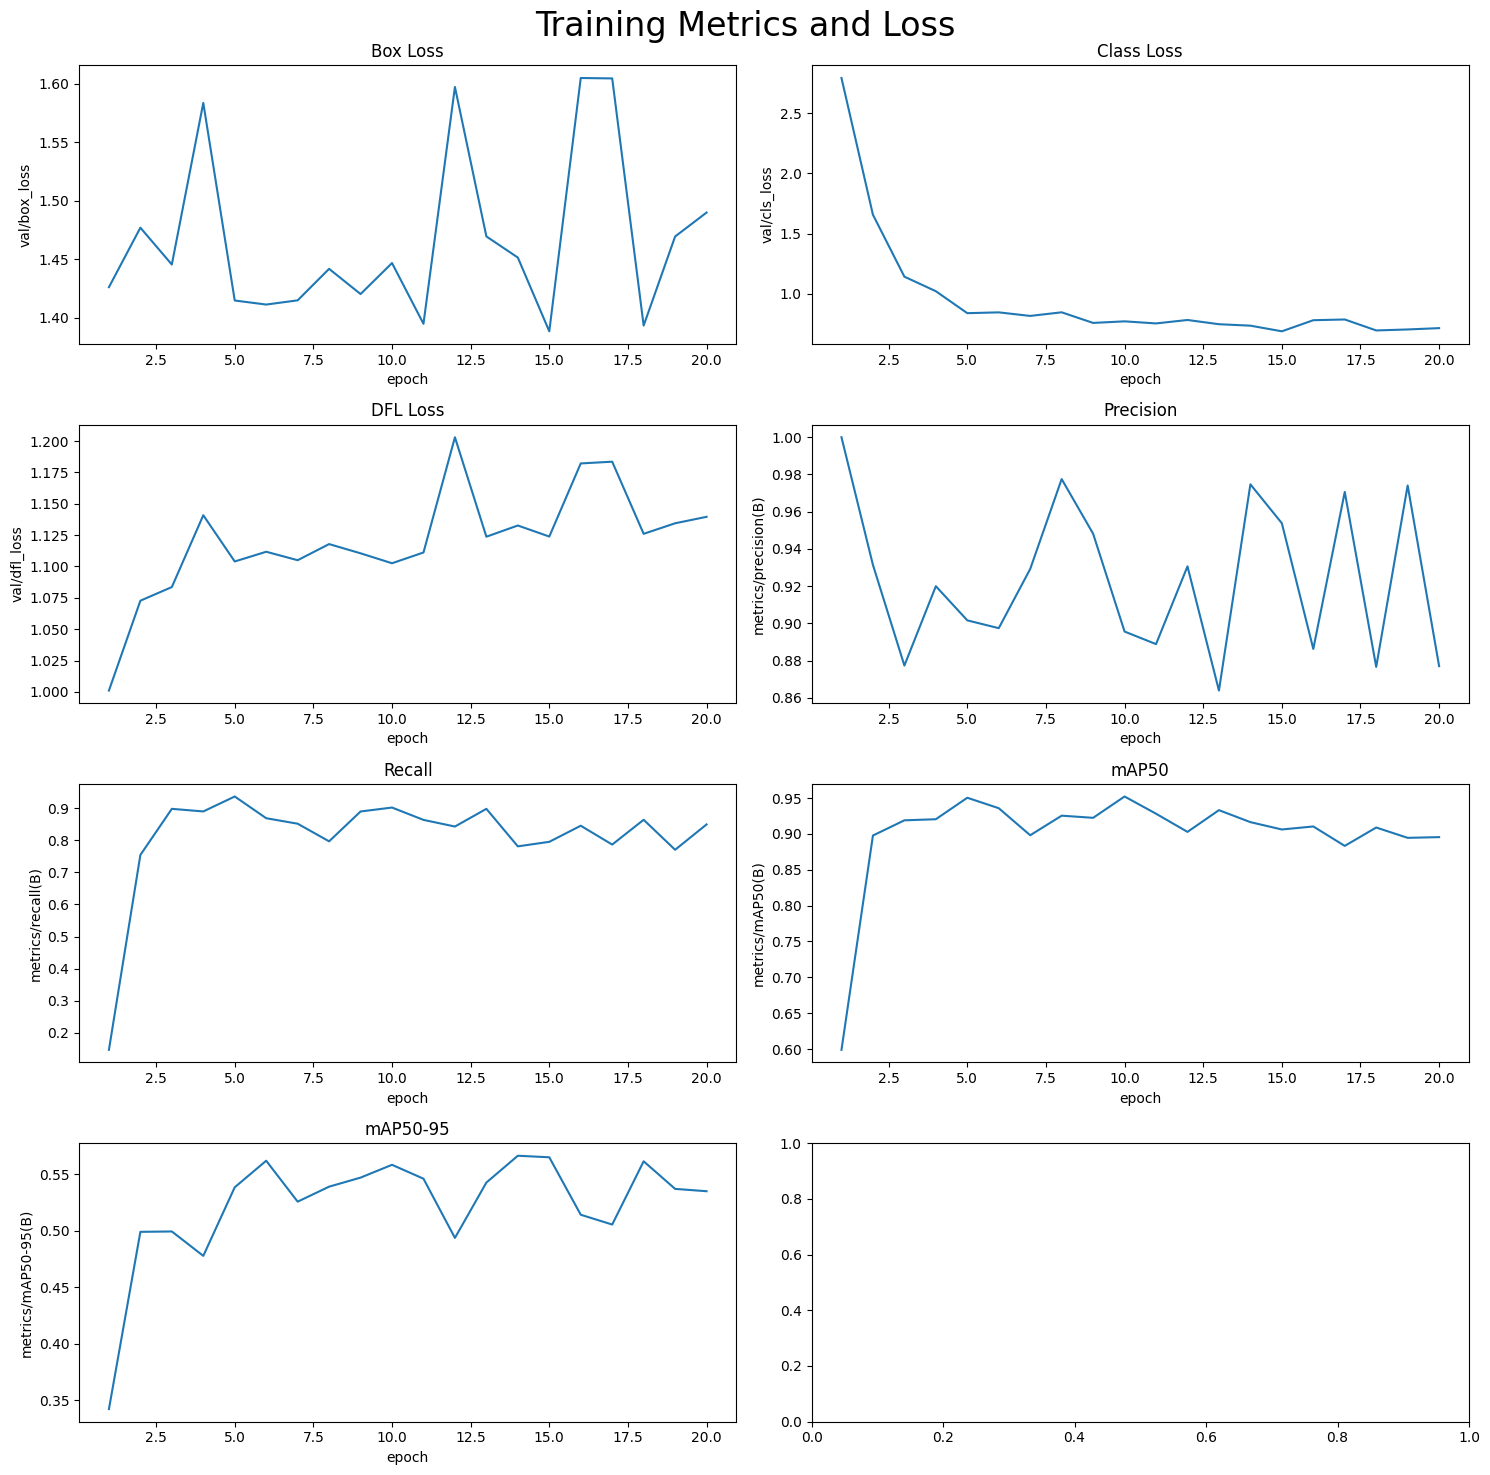

In [ ]:
import pandas as pd

df = pd.read_csv('/content/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])

axs[0,0].set(title='Box Loss')
axs[0,1].set(title='Class Loss')
axs[1,0].set(title='DFL Loss')
axs[1,1].set(title='Precision')
axs[2,0].set(title='Recall')
axs[2,1].set(title='mAP50')
axs[3,0].set(title='mAP50-95')

plt.suptitle('Training Metrics and Loss', fontsize=24)

plt.tight_layout()

plt.show()

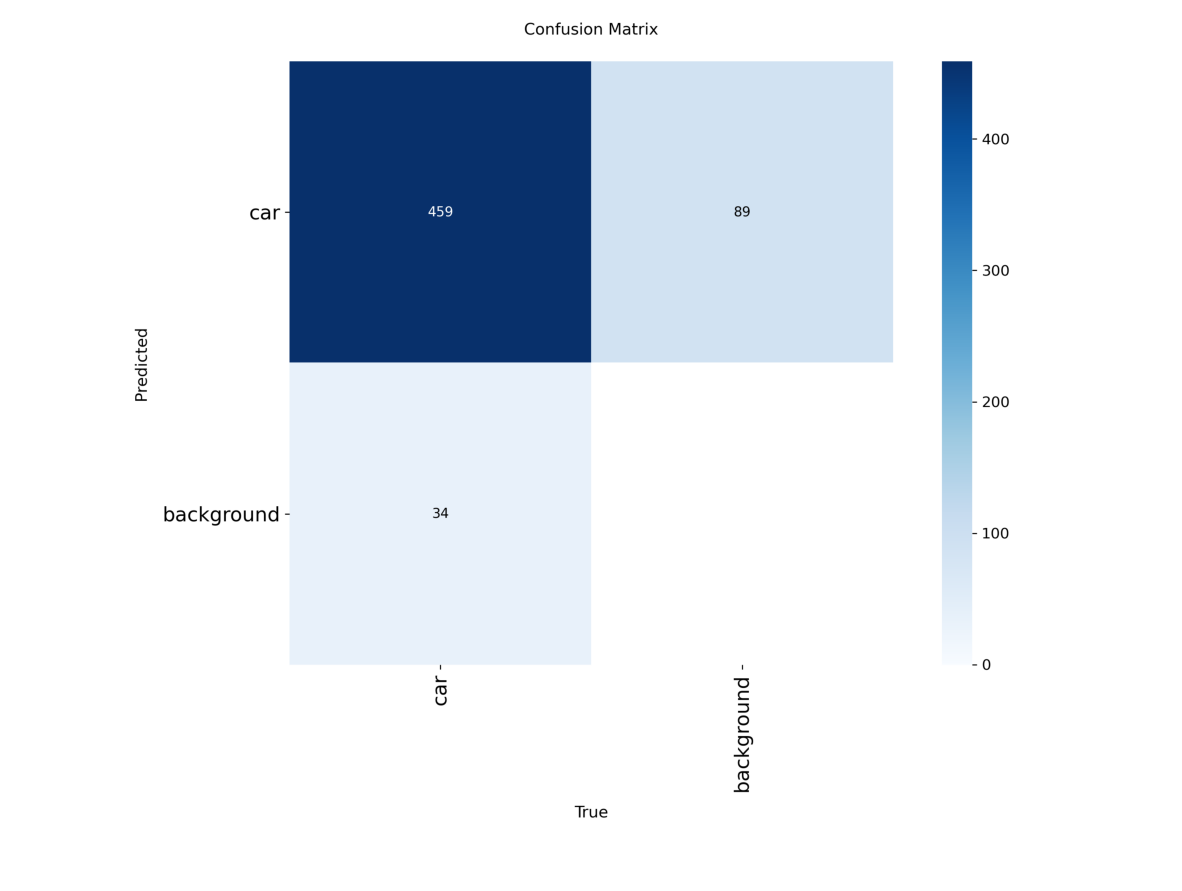

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('/content/runs/detect/train/confusion_matrix.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# Making predictions on test images

In [ ]:
def car_detect(img_path):

    img = cv2.imread(img_path)

    detect_result = model(img)

    detect_img = detect_result[0].plot()

    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x1088 5 cars, 38.6ms
Speed: 5.5ms preprocess, 38.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 7 cars, 10.9ms
Speed: 4.9ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 5 cars, 10.9ms
Speed: 6.2ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 6 cars, 10.9ms
Speed: 4.6ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 5 cars, 10.9ms
Speed: 5.4ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 6 cars, 10.9ms
Speed: 5.2ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 5 cars, 10.9ms
Speed: 5.2ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 5 cars, 10.9ms
Speed: 5.2ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640

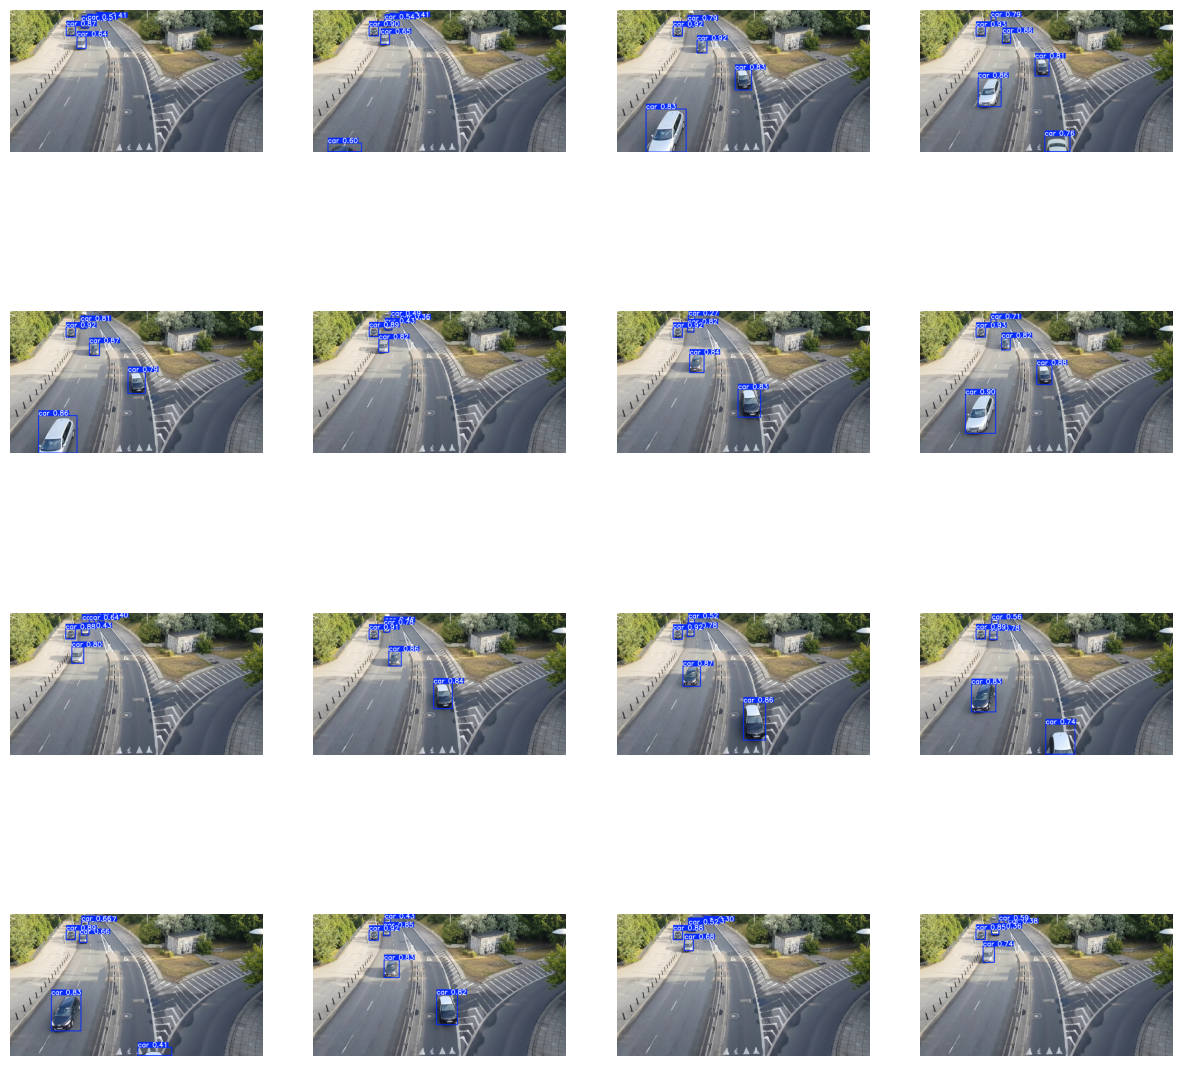

In [ ]:
image_files = os.listdir(val_images)

selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    row_idx = i // 4
    col_idx = i % 4

    img_path = os.path.join(val_images, img_file)
    detect_img = car_detect(img_path)

    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')